In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv(r"C:\Users\ADMIN\Desktop\AI\titanic.csv")

In [3]:
train_data = pd.read_csv(r"C:\Users\ADMIN\Desktop\AI\titanic.csv")
test_data = pd.read_csv(r"C:\Users\ADMIN\Desktop\AI\titanic.csv")

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)
titanic.drop(['Cabin'], axis = 1, inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
titanic['Sex'] = titanic['Sex'].map({'female' :1, 'male':0})

In [11]:
a = titanic.drop('Survived', axis=1)
b = titanic['Survived']
data = pd.concat([a, b], axis = 1)

In [12]:
data['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Pclass')

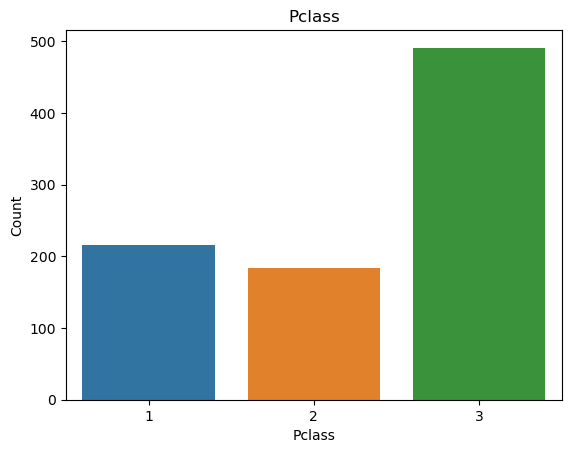

In [13]:
sns.countplot(data = data, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass")

In [14]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived')

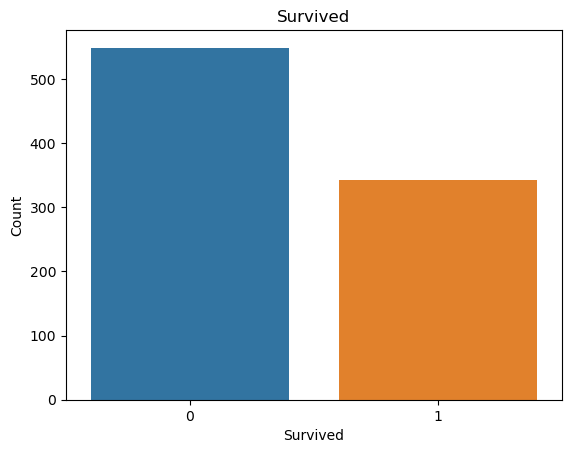

In [15]:
sns.countplot(data = data, x="Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survived")

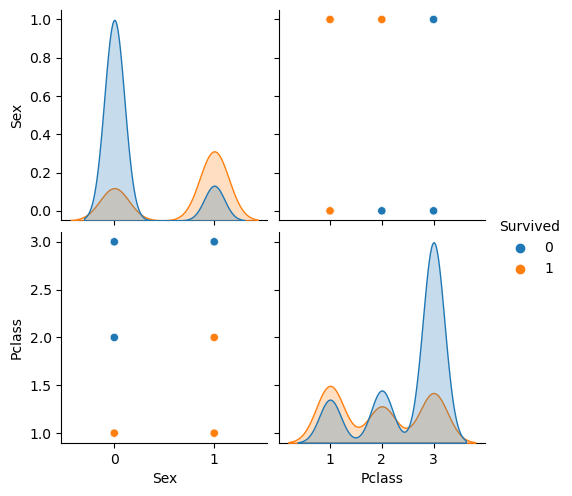

In [16]:
sns.pairplot(data, vars=['Sex', 'Pclass'], hue = 'Survived')
plt.show()

Text(0.5, 1.0, 'Sex_Pclass')

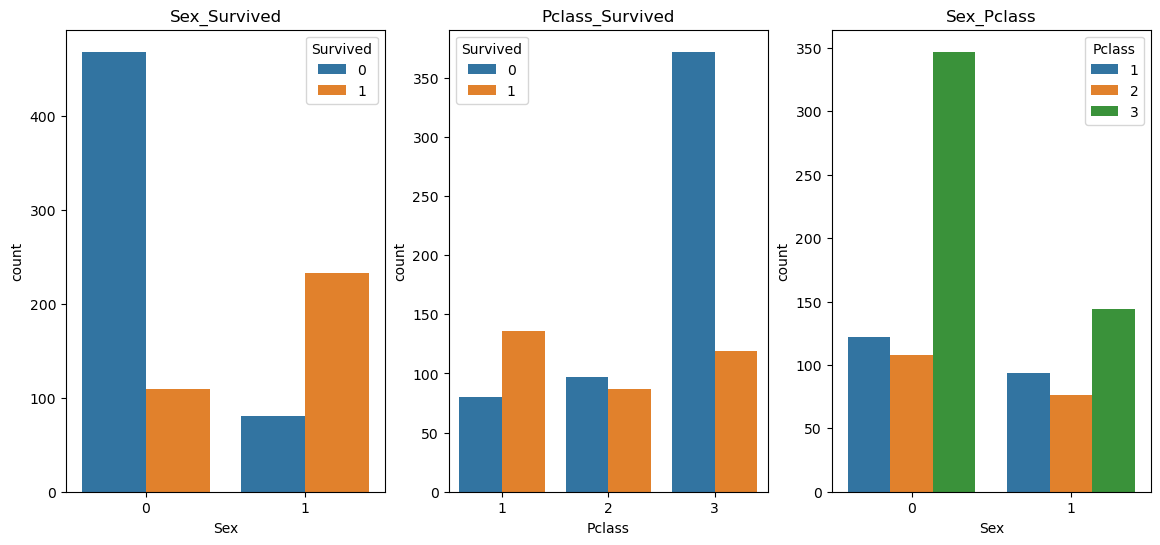

In [17]:
figure = plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,3,1)
sns.countplot(x="Sex", hue="Survived", data = titanic, ax = ax1)
plt.title("Sex_Survived")
ax2 = plt.subplot(1,3,2)
sns.countplot(x="Pclass", hue="Survived", data = titanic, ax = ax2)
plt.title("Pclass_Survived")
ax3 = plt.subplot(1,3,3)
sns.countplot(x="Sex", hue="Pclass", data = titanic, ax = ax3)
plt.title("Sex_Pclass")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

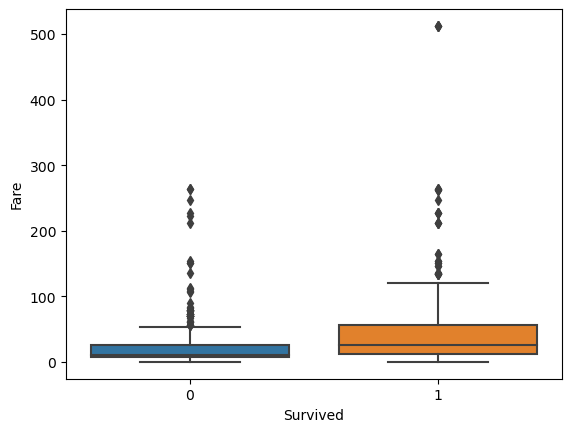

In [18]:
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic)

In [19]:
y=data.Survived.values
x_df4=data.drop(['Survived'],axis=1)
x_df3=x_df4.drop('Name',axis=1)
x_df2=x_df3.drop('Ticket',axis=1)
x_df1=x_df2.drop('PassengerId',axis=1)
x_df=x_df1.drop('Embarked',axis=1)
#normalization
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

In [20]:
titanic_drop = ['Survived', 'Name', 'Ticket', 'Embarked', 'Parch', 'Sex','SibSp']

In [21]:
X=titanic.drop(titanic[titanic_drop], axis=1)

X.head()

,PassengerId,Pclass,Age,Fare
0,1,3,22.0,7.2500
1,2,1,38.0,71.2833
2,3,3,26.0,7.9250
3,4,1,35.0,53.1000
4,5,3,35.0,8.0500


In [22]:
y=titanic['Survived']
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(accuracy_score(y_test, pred_svm))


0.664804469273743


In [25]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print (accuracy_score(y_test, pred_lr))

0.7262569832402235


In [26]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print (accuracy_score(y_test, pred_dt))

0.659217877094972


In [27]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

print(accuracy_score(y_test,pred_rf))

0.7486033519553073


In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train.values.ravel())
pred_knn = knn_model.predict(X_test)

accuracy = knn_model.score(X_test, y_test)

print(accuracy)

0.6759776536312849
